In [1]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 25)

## Series

A Series is a one-dimensional array-like object containing an array of data and an associated array of data labels. The data can be any NumPy data type and the labels are the Series' index.

In [2]:
ser_1 = Series([1, 1, 2, -3, -5, 8, 13])
ser_1

0     1
1     1
2     2
3    -3
4    -5
5     8
6    13
dtype: int64

In [3]:
ser_1.values

array([ 1,  1,  2, -3, -5,  8, 13], dtype=int64)

Index objects are immutable and hold the axis labels and metadata such as names and axis names.

In [4]:
ser_1.index

Int64Index([0, 1, 2, 3, 4, 5, 6], dtype='int64')

In [5]:
#Series with custom index
ser_2 = Series([1, 1, 2, -3, -5], index=['a', 'b', 'c', 'd', 'e'])
ser_2

a    1
b    1
c    2
d   -3
e   -5
dtype: int64

In [6]:
ser_1[5]

8

In [7]:
ser_2['c']

2

In [8]:
ser_2[['b','c','d']]

b    1
c    2
d   -3
dtype: int64

In [9]:
ser_2['c'] = 5

In [10]:
ser_2

a    1
b    1
c    5
d   -3
e   -5
dtype: int64

In [11]:
'd' in ser_2

True

In [12]:
ser_2[['c', 'a', 'b']]

c    5
a    1
b    1
dtype: int64

In [13]:
ser_2['a':'c']

a    1
b    1
c    5
dtype: int64

In [14]:
ser_2[ser_2 > 2]

c    5
dtype: int64

In [15]:
ser_2[4] == ser_2['e']

True

In [16]:
ser_2 * 5

a     5
b     5
c    25
d   -15
e   -25
dtype: int64

In [17]:
np.exp(ser_2)

a      2.718282
b      2.718282
c    148.413159
d      0.049787
e      0.006738
dtype: float64

In [18]:
ser_2.ix[1:4]

b    1
c    5
d   -3
dtype: int64

In [19]:
ser_1.append(ser_2)

0     1
1     1
2     2
3    -3
4    -5
5     8
6    13
a     1
b     1
c     5
d    -3
e    -5
dtype: int64

Create Series by passing in an Dict

In [20]:
dict_1 = {'foo':100,'bar':200,'baz':300}

ser_3 = Series(dict_1)

ser_3

bar    200
baz    300
foo    100
dtype: int64

In [21]:
# Name a Series
ser_3.name = 'avshdvbh'

In [22]:
#Name a Series Index
ser_3.index.name = 'My Index'

In [23]:
ser_3

My Index
bar    200
baz    300
foo    100
Name: avshdvbh, dtype: int64

## DataFrame

A DataFrame is a tabular data structure containing an ordered collection of columns. Each column can have a different type. DataFrames have both row and column indices and is analogous to a dict of Series. Row and column operations are treated roughly symmetrically. Columns returned when indexing a DataFrame are views of the underlying data, not a copy. To obtain a copy, use the Series' copy method.

Create a DataFrame

In [24]:
data1 = {'City': ['Pune','Mumbai','Delhi','Pune'],
       'year' : [2012,2012,2013,2013],
       'Pop' : [2.5,10.1,9.5,2.8]
           }

In [25]:
df1 = DataFrame(data1)
df1

,City,Pop,year
0,Pune,2.5,2012
1,Mumbai,10.1,2012
2,Delhi,9.5,2013
3,Pune,2.8,2013


In [26]:
df2= DataFrame(data1, columns=['year', 'City', 'Pop'])
df2

,year,City,Pop
0,2012,Pune,2.5
1,2012,Mumbai,10.1
2,2013,Delhi,9.5
3,2013,Pune,2.8


In [27]:
df2= DataFrame(data1, columns=['year', 'City', 'Pop'],index=['one','two','three','four'])
df2

,year,City,Pop
one,2012,Pune,2.5
two,2012,Mumbai,10.1
three,2013,Delhi,9.5
four,2013,Pune,2.8


## Case Study using Pandas

In [28]:
titanic = pd.read_csv('https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/train.csv')

In [29]:
#Saving DataFrame to File
titanic.to_csv('../python_pune_meetup/data/titanic.csv',index=False)

In [30]:
#Read data from clipboard
#clip = pd.read_clipboard()

In [31]:
titanic.shape

(891, 12)

In [32]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [33]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32,0,0,370376,7.75,NaN,Q


In [35]:
h = titanic.head(6)

## Selection/Indexing/Filtering

In [36]:
h

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [37]:
h.Name

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
Name: Name, dtype: object

In [38]:
h["Name"]

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
Name: Name, dtype: object

In [39]:
#Rows Can be Retrieved by Position
h.ix[4]

PassengerId                           5
Survived                              0
Pclass                                3
Name           Allen, Mr. William Henry
Sex                                male
Age                                  35
SibSp                                 0
Parch                                 0
Ticket                           373450
Fare                               8.05
Cabin                               NaN
Embarked                              S
Name: 4, dtype: object

In [40]:
h.Pclass = 3

In [41]:
h

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,3,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [42]:
newcol = np.arange(1,5)

In [43]:
newcol

array([1, 2, 3, 4])

In [45]:
h['newcol'] = Series(newcol,index=[2,4,5,6])

In [46]:
h

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,newcol
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,NaN
1,2,1,3,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,NaN
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,NaN
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,2
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,3


In [47]:
del h['newcol']

In [48]:
h

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,3,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [49]:
h.values

array([[1L, 0L, 3L, 'Braund, Mr. Owen Harris', 'male', 22.0, 1L, 0L,
        'A/5 21171', 7.25, nan, 'S'],
       [2L, 1L, 3L, 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
        'female', 38.0, 1L, 0L, 'PC 17599', 71.2833, 'C85', 'C'],
       [3L, 1L, 3L, 'Heikkinen, Miss. Laina', 'female', 26.0, 0L, 0L,
        'STON/O2. 3101282', 7.925, nan, 'S'],
       [4L, 1L, 3L, 'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
        'female', 35.0, 1L, 0L, '113803', 53.1, 'C123', 'S'],
       [5L, 0L, 3L, 'Allen, Mr. William Henry', 'male', 35.0, 0L, 0L,
        '373450', 8.05, nan, 'S'],
       [6L, 0L, 3L, 'Moran, Mr. James', 'male', nan, 0L, 0L, '330877',
        8.4583, nan, 'Q']], dtype=object)

In [50]:
h.index

Int64Index([0, 1, 2, 3, 4, 5], dtype='int64')

In [51]:
h

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,3,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [52]:
h.loc[2:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [53]:
h.loc[2:5,['Name','Sex']]

,Name,Sex
2,"Heikkinen, Miss. Laina",female
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female
4,"Allen, Mr. William Henry",male
5,"Moran, Mr. James",male


In [54]:
h.ix[4:,2:5]

,Pclass,Name,Sex
4,3,"Allen, Mr. William Henry",male
5,3,"Moran, Mr. James",male


In [55]:
h1 = h.set_index('Name')

In [56]:
h1

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Braund, Mr. Owen Harris",1,0,3,male,22,1,0,A/5 21171,7.2500,NaN,S
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,3,female,38,1,0,PC 17599,71.2833,C85,C
"Heikkinen, Miss. Laina",3,1,3,female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,3,female,35,1,0,113803,53.1000,C123,S
"Allen, Mr. William Henry",5,0,3,male,35,0,0,373450,8.0500,NaN,S
"Moran, Mr. James",6,0,3,male,NaN,0,0,330877,8.4583,NaN,Q


In [57]:
h1.loc['Heikkinen, Miss. Laina':'Moran, Mr. James']

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Heikkinen, Miss. Laina",3,1,3,female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,3,female,35,1,0,113803,53.1000,C123,S
"Allen, Mr. William Henry",5,0,3,male,35,0,0,373450,8.0500,NaN,S
"Moran, Mr. James",6,0,3,male,NaN,0,0,330877,8.4583,NaN,Q


In [58]:
h.Sex == 'male'

0     True
1    False
2    False
3    False
4     True
5     True
Name: Sex, dtype: bool

In [59]:
h[h.Sex == 'male']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [61]:
h[h.Sex == 'male' and h.Age < 25]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [62]:
h[(h.Sex == 'male') & (h.Age < 30)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,NaN,S


In [63]:
h[(h.Sex == 'male') | (h.Age < 30)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [64]:
h[(h.Sex == 'male') | (h.Age < 30)].sort_values(by='Age')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [65]:
titanic.sort_values(by='Fare',ascending=False).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35,0,0,PC 17755,512.3292,NaN,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35,0,0,PC 17755,512.3292,B101,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36,0,1,PC 17755,512.3292,B51 B53 B55,C
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23,3,2,19950,263.0000,C23 C25 C27,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19,3,2,19950,263.0000,C23 C25 C27,S


In [66]:
h.Age.isnull()

0    False
1    False
2    False
3    False
4    False
5     True
Name: Age, dtype: bool

In [67]:
h[h.Age.notnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,3,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [68]:
h.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,3,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [70]:
h[h.Pclass.isin([3])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,3,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


## String Operations

In [71]:
h

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,3,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [72]:
h.Name.startswith('M')

AttributeError: 'Series' object has no attribute 'startswith'

In [73]:
h.Name.str.startswith('M')

0    False
1    False
2    False
3    False
4    False
5     True
Name: Name, dtype: bool

In [74]:
h[h.Name.str.startswith('M')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [75]:
h[h.Name.str.contains('Mr.')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,3,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
3,4,1,3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [76]:
h.Name.str.len()

0    23
1    51
2    22
3    44
4    24
5    16
Name: Name, dtype: int64

## Date Operations

In [77]:
ufo = pd.read_csv('http://bit.ly/uforeports')

In [78]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [79]:
ufo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18241 entries, 0 to 18240
Data columns (total 5 columns):
City               18216 non-null object
Colors Reported    2882 non-null object
Shape Reported     15597 non-null object
State              18241 non-null object
Time               18241 non-null object
dtypes: object(5)
memory usage: 855.0+ KB


In [80]:
u = ufo.head()

In [81]:
#Converting to datetime

u['Time'] = pd.to_datetime(u.Time)

In [82]:
u.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 0 to 4
Data columns (total 5 columns):
City               5 non-null object
Colors Reported    0 non-null object
Shape Reported     5 non-null object
State              5 non-null object
Time               5 non-null datetime64[ns]
dtypes: datetime64[ns](1), object(4)
memory usage: 240.0+ bytes


In [83]:
u.Time.dt.year

0    1930
1    1930
2    1931
3    1931
4    1933
Name: Time, dtype: int64

In [84]:
u.Time.dt.day

0     1
1    30
2    15
3     1
4    18
Name: Time, dtype: int64

In [85]:
u['month'] = u.Time.dt.month

In [86]:
u['year'] = u.Time.dt.year

In [87]:
u.head()

,City,Colors Reported,Shape Reported,State,Time,month,year
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,6,1930
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,6,1930
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,2,1931
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,6,1931
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,4,1933


In [89]:
import datetime as dt

now = dt.datetime.now()

u['Age'] = (now - u.Time).dt.days / 365

In [90]:
u

,City,Colors Reported,Shape Reported,State,Time,month,year,Age
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,6,1930,86.043836
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,6,1930,85.964384
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,2,1931,85.334247
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,6,1931,85.043836
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,4,1933,83.161644


## All about Indexing

In [91]:
ufo.shape

(18241, 5)

In [92]:
df = pd.concat([ufo,ufo,ufo,ufo,ufo,ufo,ufo,ufo,ufo,ufo,ufo,ufo,ufo,ufo,ufo,ufo,ufo,ufo,ufo,ufo,ufo,ufo,ufo,ufo,ufo,ufo,ufo])

In [93]:
df.shape

(492507, 5)

In [94]:
df.sample(5)

,City,Colors Reported,Shape Reported,State,Time
5209,Beaver Damm,NaN,CIGAR,WI,5/15/1985 17:00
10008,Northwest Tempe,RED,FORMATION,AZ,3/13/1997 20:20
10973,Olympia,NaN,FORMATION,WA,11/14/1997 21:30
17187,Nevada City,RED GREEN BLUE,VARIOUS,CA,8/13/2000 23:30
7933,Bakersfield,NaN,NaN,CA,3/18/1995 21:49


In [95]:
%%time
df[df.City=='Estes Park'].head()

Wall time: 62 ms


,City,Colors Reported,Shape Reported,State,Time
276,Estes Park,NaN,CIGAR,CO,6/10/1954 20:00
2998,Estes Park,NaN,LIGHT,CO,7/15/1975 20:30
4594,Estes Park,NaN,NaN,CO,8/1/1981 22:00
12858,Estes Park,NaN,CIRCLE,CO,1/5/1999 14:00
18142,Estes Park,NaN,CHEVRON,CO,12/17/2000 18:15


In [96]:
df1 = df.set_index('City')

In [97]:
df1.head()

,Colors Reported,Shape Reported,State,Time
City,,,,
Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
Holyoke,NaN,OVAL,CO,2/15/1931 14:00
Abilene,NaN,DISK,KS,6/1/1931 13:00
New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [98]:
%%time
df1.loc['Estes Park'].head()

Wall time: 167 ms


,Colors Reported,Shape Reported,State,Time
City,,,,
Estes Park,NaN,CIGAR,CO,6/10/1954 20:00
Estes Park,NaN,LIGHT,CO,7/15/1975 20:30
Estes Park,NaN,NaN,CO,8/1/1981 22:00
Estes Park,NaN,CIRCLE,CO,1/5/1999 14:00
Estes Park,NaN,CHEVRON,CO,12/17/2000 18:15


In [99]:
df1 = df1.sort_index()

In [100]:
%%time
df1.loc['Estes Park'].head()

Wall time: 122 ms


,Colors Reported,Shape Reported,State,Time
City,,,,
Estes Park,NaN,CIRCLE,CO,1/5/1999 14:00
Estes Park,NaN,NaN,CO,8/1/1981 22:00
Estes Park,NaN,CIRCLE,CO,1/5/1999 14:00
Estes Park,NaN,CHEVRON,CO,12/17/2000 18:15
Estes Park,NaN,CIRCLE,CO,1/5/1999 14:00


In [101]:
#Multilevel Index
df1 = df.set_index(['State','City']).sort_index()

In [102]:
df1.sample(10)

Colors Reported Shape Reported  \
State City                                                        
MT    Jewell Basin National Park             NaN          OTHER   
PA    Ambridge                               NaN      RECTANGLE   
CA    Lake Arrowhead                         NaN         CIRCLE   
ID    Meridian                               NaN          OTHER   
NC    Highpoint                              NaN            NaN   
WA    George                               GREEN          LIGHT   
      Seattle                                NaN       TRIANGLE   
CA    Pacific Palisades                      NaN       TRIANGLE   
NY    Edwards                                NaN        CHEVRON   
CT    Norwark                                NaN       FIREBALL   

                                              Time  
State City                                          
MT    Jewell Basin National Park   3/10/1999 23:24  
PA    Ambridge                     4/22/1999 21:43  
CA    Lake Arrowhead                 2/1/1979 2:30  
ID    Meridian                      7/3/2000 17:00  
NC    Highpoint                    7/30/1995 22:05  
WA    George                         7/1/2000 0:10  
      Seattle                       9/19/1999 2:51  
CA    Pacific Palisades             6/1/1976 17:00  
NY    Edwards                       8/20/1980 1:00  
CT    Norwark                     10/12/1999 23:00

In [103]:
df1.loc['CA'].head()

,Colors Reported,Shape Reported,Time
City,,,
NaN,NaN,DISK,7/15/1952 12:30
NaN,NaN,SPHERE,6/23/1982 23:00
NaN,NaN,VARIOUS,12/8/1995 18:00
NaN,NaN,OVAL,6/12/1996 12:00
NaN,NaN,DISK,7/15/1952 12:30


In [104]:
df1.loc['CA'].loc['Los Angeles'].head()

,Colors Reported,Shape Reported,Time
City,,,
Los Angeles,NaN,NaN,2/25/1942 0:00
Los Angeles,NaN,DISK,2/15/1951 11:00
Los Angeles,NaN,FIREBALL,4/15/1953 12:00
Los Angeles,RED,CIRCLE,7/1/1954 22:00
Los Angeles,NaN,FORMATION,3/15/1957 13:00


In [105]:
df1.loc[('CA','Los Angeles')].head()

Colors Reported Shape Reported             Time
State City                                                       
CA    Los Angeles             NaN            NaN   2/25/1942 0:00
      Los Angeles             NaN           DISK  2/15/1951 11:00
      Los Angeles             NaN       FIREBALL  4/15/1953 12:00
      Los Angeles             RED         CIRCLE   7/1/1954 22:00
      Los Angeles             NaN      FORMATION  3/15/1957 13:00

In [106]:
df1.loc[('CA','Los Angeles')].head().reset_index()

,State,City,Colors Reported,Shape Reported,Time
0,CA,Los Angeles,NaN,NaN,2/25/1942 0:00
1,CA,Los Angeles,NaN,DISK,2/15/1951 11:00
2,CA,Los Angeles,NaN,FIREBALL,4/15/1953 12:00
3,CA,Los Angeles,RED,CIRCLE,7/1/1954 22:00
4,CA,Los Angeles,NaN,FORMATION,3/15/1957 13:00


In [107]:
df1.loc[('CA','Los Angeles')].head().reset_index('City')

,City,Colors Reported,Shape Reported,Time
State,,,,
CA,Los Angeles,NaN,NaN,2/25/1942 0:00
CA,Los Angeles,NaN,DISK,2/15/1951 11:00
CA,Los Angeles,NaN,FIREBALL,4/15/1953 12:00
CA,Los Angeles,RED,CIRCLE,7/1/1954 22:00
CA,Los Angeles,NaN,FORMATION,3/15/1957 13:00


In [108]:
df.index.is_unique

False

## Lets do grouping..!! 

In [109]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,3,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [110]:
grp = titanic.groupby(['Pclass','Sex'])

In [111]:
grp

In [112]:
for name, group in grp:
    print name, group.head()

(1, 'female')     PassengerId  Survived  Pclass  \
11           12         1       1   
31           32         1       1   
52           53         1       1   
61           62         1       1   
88           89         1       1   

                                              Name     Sex  Age  SibSp  Parch  \
11                        Bonnell, Miss. Elizabeth  female   58      0      0   
31  Spencer, Mrs. William Augustus (Marie Eugenie)  female  NaN      1      0   
52        Harper, Mrs. Henry Sleeper (Myna Haxtun)  female   49      1      0   
61                             Icard, Miss. Amelie  female   38      0      0   
88                      Fortune, Miss. Mabel Helen  female   23      3      2   

      Ticket      Fare        Cabin Embarked  
11    113783   26.5500         C103        S  
31  PC 17569  146.5208          B78        C  
52  PC 17572   76.7292          D33        C  
61    113572   80.0000          B28      NaN  
88     19950  263.0000  C23 C25 C27      

In [113]:
grp.size()

Pclass  Sex   
1       female     92
        male      122
2       female     76
        male      108
3       female    146
        male      347
dtype: int64

In [114]:
grp['Age'].mean()

Pclass  Sex   
1       female    34.566265
        male      41.281386
2       female    28.722973
        male      30.740707
3       female    22.033654
        male      26.507589
Name: Age, dtype: float64

In [115]:
grp['Age'].max()

Pclass  Sex   
1       female    63
        male      80
2       female    57
        male      70
3       female    63
        male      74
Name: Age, dtype: float64

In [116]:
grp['Fare'].min()

Pclass  Sex   
1       female    25.9292
        male       0.0000
2       female    10.5000
        male       0.0000
3       female     6.7500
        male       0.0000
Name: Fare, dtype: float64

In [117]:
grp['Fare'].std()

Pclass  Sex   
1       female    74.770205
        male      77.548021
2       female    10.891796
        male      14.922235
3       female    12.837296
        male      11.681696
Name: Fare, dtype: float64

In [118]:
type(grp['Fare'].std())

pandas.core.series.Series

In [119]:
grp = titanic.groupby(['Embarked','Pclass','Sex'])

In [120]:
grp['Fare'].mean()

Embarked  Pclass  Sex   
C         1       female    116.696429
                  male       93.536707
          2       female     25.268457
                  male       25.421250
          3       female     17.052775
                  male        9.352237
Q         1       female     90.000000
                  male       90.000000
          2       female     12.350000
                  male       12.350000
          3       female     10.307833
                  male       11.924251
S         1       female    100.004079
                  male       52.949947
          2       female     21.912687
                  male       19.232474
          3       female     19.056930
                  male       13.307149
Name: Fare, dtype: float64

In [121]:
grp['Fare'].mean().unstack(['Sex'])

Sex                  female       male
Embarked Pclass                       
C        1       116.696429  93.536707
         2        25.268457  25.421250
         3        17.052775   9.352237
Q        1        90.000000  90.000000
         2        12.350000  12.350000
         3        10.307833  11.924251
S        1       100.004079  52.949947
         2        21.912687  19.232474
         3        19.056930  13.307149

In [122]:
dummy = grp['Fare'].mean().unstack(['Sex'])

In [123]:
dummy

Sex                  female       male
Embarked Pclass                       
C        1       116.696429  93.536707
         2        25.268457  25.421250
         3        17.052775   9.352237
Q        1        90.000000  90.000000
         2        12.350000  12.350000
         3        10.307833  11.924251
S        1       100.004079  52.949947
         2        21.912687  19.232474
         3        19.056930  13.307149

In [124]:
dummy['Fare-diff'] = abs(dummy['female'] - dummy['male'])

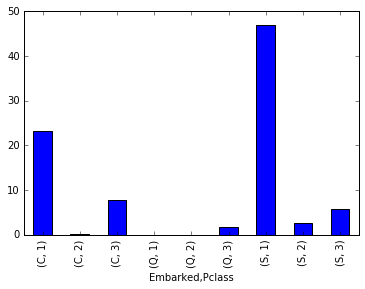

In [125]:
dummy['Fare-diff'].plot(kind='bar')

In [126]:
grp['Fare'].mean().unstack().unstack()

Sex           female                             male                      
Pclass             1          2          3          1          2          3
Embarked                                                                   
C         116.696429  25.268457  17.052775  93.536707  25.421250   9.352237
Q          90.000000  12.350000  10.307833  90.000000  12.350000  11.924251
S         100.004079  21.912687  19.056930  52.949947  19.232474  13.307149

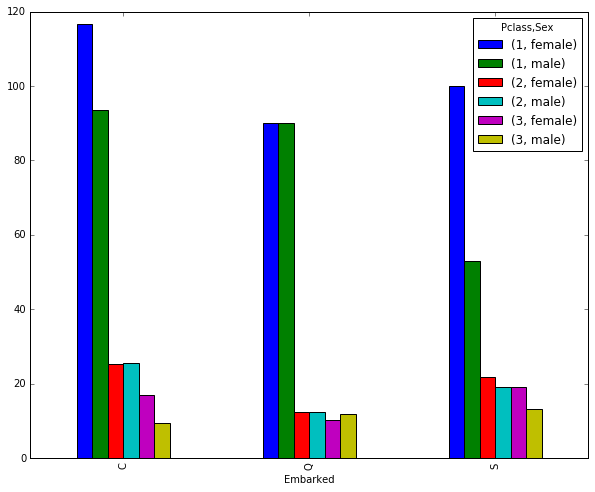

In [127]:
grp['Fare'].mean().unstack(['Pclass','Sex']).plot(kind='bar',figsize=(10,8))

## Dataframe Operations

In [128]:
#drop duplicates #Describe #drop columns #Concat #Merge  #Apply #map #Ranks #Pivit Tables #Binning

In [129]:
ufo.describe()

,City,Colors Reported,Shape Reported,State,Time
count,18216,2882,15597,18241,18241
unique,6476,27,27,52,16145
top,Seattle,RED,LIGHT,CA,11/16/1999 19:00
freq,187,780,2803,2529,27


In [130]:
ufo.City.describe()

count       18216
unique       6476
top       Seattle
freq          187
Name: City, dtype: object

In [131]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [132]:
ufo[ufo.duplicated()].head()

,City,Colors Reported,Shape Reported,State,Time
195,Miami,NaN,DISK,FL,6/30/1952 21:00
469,Madison,NaN,CIGAR,WI,12/28/1957 0:00
473,Winooski,NaN,OVAL,VT,4/17/1958 21:30
869,Covina,NaN,CIGAR,CA,5/15/1964 15:00
943,Mt. Prospect,NaN,DISK,IL,9/25/1964 19:00


In [133]:
ufo[(ufo.City=='Miami') & (ufo.Time=='6/30/1952 21:00')]

,City,Colors Reported,Shape Reported,State,Time
194,Miami,NaN,DISK,FL,6/30/1952 21:00
195,Miami,NaN,DISK,FL,6/30/1952 21:00
196,Miami,NaN,LIGHT,FL,6/30/1952 21:00


In [134]:
ufo[ufo.duplicated(['City','State'])].head()

,City,Colors Reported,Shape Reported,State,Time
22,NaN,NaN,LIGHT,LA,8/15/1943 0:00
26,Wilderness,NaN,DISK,WV,1/1/1944 12:00
71,Roswell,NaN,NaN,NM,7/7/1947 0:00
73,Roswell,NaN,NaN,NM,7/11/1947 0:00
74,Syracuse,NaN,CIGAR,NY,7/14/1947 10:30


In [135]:
ufo_new = ufo.drop_duplicates()

In [136]:
ufo_new.shape , ufo.shape

((18132, 5), (18241, 5))

In [137]:
ufo.duplicated().value_counts()

False    18132
True       109
dtype: int64

In [138]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [139]:
#Drop columns

ufo_new = ufo[['City','Shape Reported','State','Time']]

In [140]:
ufo_new.head()

,City,Shape Reported,State,Time
0,Ithaca,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,OTHER,NJ,6/30/1930 20:00
2,Holyoke,OVAL,CO,2/15/1931 14:00
3,Abilene,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,LIGHT,NY,4/18/1933 19:00


In [141]:
ufo_new = ufo.drop('Colors Reported',axis=1)  # inplace = True

### Merge, Join , Concat

In [142]:
raw_data = {
        'subject_id': ['1', '2', '3', '4', '5'],
        'first_name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'], 
        'last_name': ['Anderson', 'Ackerman', 'Ali', 'Aoni', 'Atiches']}
df_a = pd.DataFrame(raw_data, columns = ['subject_id', 'first_name', 'last_name'])
df_a

,subject_id,first_name,last_name
0,1,Alex,Anderson
1,2,Amy,Ackerman
2,3,Allen,Ali
3,4,Alice,Aoni
4,5,Ayoung,Atiches


In [143]:
raw_data = {
        'subject_id': ['4', '5', '6', '7', '8'],
        'first_name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'], 
        'last_name': ['Bonder', 'Black', 'Balwner', 'Brice', 'Btisan']}
df_b = pd.DataFrame(raw_data, columns = ['subject_id', 'first_name', 'last_name'])
df_b

,subject_id,first_name,last_name
0,4,Billy,Bonder
1,5,Brian,Black
2,6,Bran,Balwner
3,7,Bryce,Brice
4,8,Betty,Btisan


In [144]:
raw_data = {
        'subject_id': ['1', '2', '3', '4', '5', '7', '8', '9', '10', '11'],
        'test_id': [51, 15, 15, 61, 16, 14, 15, 1, 61, 16]}
df_n = pd.DataFrame(raw_data, columns = ['subject_id','test_id'])
df_n

,subject_id,test_id
0,1,51
1,2,15
2,3,15
3,4,61
4,5,16
5,7,14
6,8,15
7,9,1
8,10,61
9,11,16


In [145]:
df_new = pd.concat([df_a, df_b],axis=0,ignore_index=True)
print df_a.shape , df_b.shape , df_new.shape
df_new

(5, 3) (5, 3) (10, 3)


,subject_id,first_name,last_name
0,1,Alex,Anderson
1,2,Amy,Ackerman
2,3,Allen,Ali
3,4,Alice,Aoni
4,5,Ayoung,Atiches
5,4,Billy,Bonder
6,5,Brian,Black
7,6,Bran,Balwner
8,7,Bryce,Brice
9,8,Betty,Btisan


In [146]:
df_a.append(df_b)

,subject_id,first_name,last_name
0,1,Alex,Anderson
1,2,Amy,Ackerman
2,3,Allen,Ali
3,4,Alice,Aoni
4,5,Ayoung,Atiches
0,4,Billy,Bonder
1,5,Brian,Black
2,6,Bran,Balwner
3,7,Bryce,Brice
4,8,Betty,Btisan


In [147]:
pd.merge(df_new, df_n, on='subject_id',how='inner')

,subject_id,first_name,last_name,test_id
0,1,Alex,Anderson,51
1,2,Amy,Ackerman,15
2,3,Allen,Ali,15
3,4,Alice,Aoni,61
4,4,Billy,Bonder,61
5,5,Ayoung,Atiches,16
6,5,Brian,Black,16
7,7,Bryce,Brice,14
8,8,Betty,Btisan,15


In [148]:
pd.merge(df_new, df_n)

,subject_id,first_name,last_name,test_id
0,1,Alex,Anderson,51
1,2,Amy,Ackerman,15
2,3,Allen,Ali,15
3,4,Alice,Aoni,61
4,4,Billy,Bonder,61
5,5,Ayoung,Atiches,16
6,5,Brian,Black,16
7,7,Bryce,Brice,14
8,8,Betty,Btisan,15


In [149]:
pd.merge(df_new, df_n, left_on='subject_id', right_on='subject_id')

,subject_id,first_name,last_name,test_id
0,1,Alex,Anderson,51
1,2,Amy,Ackerman,15
2,3,Allen,Ali,15
3,4,Alice,Aoni,61
4,4,Billy,Bonder,61
5,5,Ayoung,Atiches,16
6,5,Brian,Black,16
7,7,Bryce,Brice,14
8,8,Betty,Btisan,15


In [150]:
pd.merge(df_a, df_b, on='subject_id', how='outer')

,subject_id,first_name_x,last_name_x,first_name_y,last_name_y
0,1,Alex,Anderson,NaN,NaN
1,2,Amy,Ackerman,NaN,NaN
2,3,Allen,Ali,NaN,NaN
3,4,Alice,Aoni,Billy,Bonder
4,5,Ayoung,Atiches,Brian,Black
5,6,NaN,NaN,Bran,Balwner
6,7,NaN,NaN,Bryce,Brice
7,8,NaN,NaN,Betty,Btisan


In [151]:
pd.merge(df_a, df_b, on='subject_id', how='left', suffixes=('_left', '_right'))

,subject_id,first_name_left,last_name_left,first_name_right,last_name_right
0,1,Alex,Anderson,NaN,NaN
1,2,Amy,Ackerman,NaN,NaN
2,3,Allen,Ali,NaN,NaN
3,4,Alice,Aoni,Billy,Bonder
4,5,Ayoung,Atiches,Brian,Black


In [152]:
pd.merge(df_a, df_b, right_index=True, left_index=True)

,subject_id_x,first_name_x,last_name_x,subject_id_y,first_name_y,last_name_y
0,1,Alex,Anderson,4,Billy,Bonder
1,2,Amy,Ackerman,5,Brian,Black
2,3,Allen,Ali,6,Bran,Balwner
3,4,Alice,Aoni,7,Bryce,Brice
4,5,Ayoung,Atiches,8,Betty,Btisan


In [153]:
df_a = df_a.set_index('subject_id')
df_b = df_b.set_index('subject_id')

In [154]:
df_a.join(df_b,lsuffix='_Left',rsuffix='_Right',how='inner')

,first_name_Left,last_name_Left,first_name_Right,last_name_Right
subject_id,,,,
4,Alice,Aoni,Billy,Bonder
5,Ayoung,Atiches,Brian,Black


### Apply , Map & Applymap

In [155]:
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,3,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [156]:
class_dict = {3:'Bronze',
             2:'Silver',
             1:'Gold'}

titanic.Pclass.map(class_dict)[:10]

0    Bronze
1    Bronze
2    Bronze
3    Bronze
4    Bronze
5    Bronze
6      Gold
7    Bronze
8    Bronze
9    Silver
Name: Pclass, dtype: object

In [157]:
f = lambda x: x + 10

titanic.Age.map(f)[:10]  # Replace map with apply does the same

0    32
1    48
2    36
3    45
4    45
5   NaN
6    64
7    12
8    37
9    24
Name: Age, dtype: float64

In [158]:
titanic[['PassengerId','Survived','Pclass']].head()

,PassengerId,Survived,Pclass
0,1,0,3
1,2,1,3
2,3,1,3
3,4,1,3
4,5,0,3


In [159]:
titanic[['PassengerId','Survived','Pclass']].applymap(lambda x: x**2).head()

,PassengerId,Survived,Pclass
0,1,0,9
1,4,1,9
2,9,1,9
3,16,1,9
4,25,0,9


In [160]:
titanic[['Name','Sex']].applymap(lambda x: str(x).upper()).head()

,Name,Sex
0,"BRAUND, MR. OWEN HARRIS",MALE
1,"CUMINGS, MRS. JOHN BRADLEY (FLORENCE BRIGGS TH...",FEMALE
2,"HEIKKINEN, MISS. LAINA",FEMALE
3,"FUTRELLE, MRS. JACQUES HEATH (LILY MAY PEEL)",FEMALE
4,"ALLEN, MR. WILLIAM HENRY",MALE


In [161]:
titanic[['PassengerId','Survived','Pclass']].apply(lambda x: max(x)) # Use of Axis and other funtions such as mean,max,min,sum

PassengerId    891
Survived         1
Pclass           3
dtype: int64

### Sorting

In [162]:
h

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,3,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [163]:
h.sort_index()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,3,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [164]:
h.sort_index(ascending=False)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
3,4,1,3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
1,2,1,3,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S


In [165]:
h.sort_index(axis=1)  # Sort by column names

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171
1,38,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,3,female,1,1,PC 17599
2,26,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282
3,35,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,3,female,1,1,113803
4,35,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0,373450
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0,330877


In [166]:
h.Age.order()

0    22
2    26
3    35
4    35
1    38
5   NaN
Name: Age, dtype: float64

In [167]:
#Sort Dataframe by columns
h.sort_index(by='Age')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
1,2,1,3,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [168]:
h.sort_index(by=['Sex','Age'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
1,2,1,3,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


### Ranking

In [169]:
df_a = df_a.reset_index()
marks = Series([67,78,56,35,35])
df_a['Marks'] = marks
df_a

,subject_id,first_name,last_name,Marks
0,1,Alex,Anderson,67
1,2,Amy,Ackerman,78
2,3,Allen,Ali,56
3,4,Alice,Aoni,35
4,5,Ayoung,Atiches,35


In [170]:
df_a.rank()

,subject_id,first_name,last_name,Marks
0,1,1,3,4.0
1,2,4,1,5.0
2,3,3,2,3.0
3,4,2,4,1.5
4,5,5,5,1.5


In [171]:
df_a.rank(method='dense',ascending=False)  #Method - Min , Max, Average , dense

,subject_id,first_name,last_name,Marks
0,5,5,3,2
1,4,2,5,1
2,3,3,4,3
3,2,4,2,4
4,1,1,1,4


In [172]:
df_a.Marks.rank(method='dense')

0    3
1    4
2    2
3    1
4    1
Name: Marks, dtype: float64

In [173]:
df_a['Marks_Rank']= df_a.Marks.rank(method='dense',ascending=False)

In [174]:
df_a

,subject_id,first_name,last_name,Marks,Marks_Rank
0,1,Alex,Anderson,67,2
1,2,Amy,Ackerman,78,1
2,3,Allen,Ali,56,3
3,4,Alice,Aoni,35,4
4,5,Ayoung,Atiches,35,4


In [175]:
df_a.sort_values(by='Marks_Rank')

,subject_id,first_name,last_name,Marks,Marks_Rank
1,2,Amy,Ackerman,78,1
0,1,Alex,Anderson,67,2
2,3,Allen,Ali,56,3
3,4,Alice,Aoni,35,4
4,5,Ayoung,Atiches,35,4


### Summarizing and Descriptive Statistics

In [176]:
h

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,3,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [177]:
h.sum()

PassengerId     21.0000
Survived         3.0000
Pclass          18.0000
Age            156.0000
SibSp            3.0000
Parch            0.0000
Fare           156.0666
dtype: float64

In [178]:
h.sum(axis=1)

0     34.2500
1    116.2833
2     40.9250
3     97.1000
4     51.0500
5     17.4583
dtype: float64

In [179]:
h.mean(axis=0)

PassengerId     3.5000
Survived        0.5000
Pclass          3.0000
Age            31.2000
SibSp           0.5000
Parch           0.0000
Fare           26.0111
dtype: float64

In [180]:
h.max()

PassengerId                   6
Survived                      1
Pclass                        3
Name           Moran, Mr. James
Sex                        male
Age                          38
SibSp                         1
Parch                         0
Ticket         STON/O2. 3101282
Fare                    71.2833
Cabin                       C85
Embarked                      S
dtype: object

In [181]:
h.Age.corr(h.Fare)

0.73044778760414364

In [182]:
h

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,3,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [183]:
h.Sex.unique()

array(['male', 'female'], dtype=object)

In [184]:
h.Sex.value_counts()

male      3
female    3
Name: Sex, dtype: int64

### Pivoting & Cross Tabulation

In [185]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,3,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [186]:
titanic.pivot_table(index='Sex',columns=['Pclass'],values='Survived')

Pclass,1,2,3
Sex,,,
female,0.967391,0.921053,0.506849
male,0.368852,0.157407,0.135447


In [187]:
titanic.pivot_table(index='Sex',columns=['Pclass'],values='Age',aggfunc='max')

Pclass,1,2,3
Sex,,,
female,63,57,63
male,80,70,74


In [188]:
titanic.pivot_table(index='Pclass',columns='Sex',values='Age',aggfunc='mean')

Sex,female,male
Pclass,,
1,34.566265,41.281386
2,28.722973,30.740707
3,22.033654,26.507589


In [189]:
h

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,3,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [190]:
pd.crosstab(h.Survived,h.Sex)

Sex,female,male
Survived,,
0,0,3
1,3,0


In [191]:
pd.crosstab(h.Embarked,h.Survived)

Survived,0,1
Embarked,,
C,0,1
Q,1,0
S,2,2


In [192]:
pd.crosstab([h.Embarked,h.Sex],h.Survived)

Survived         0  1
Embarked Sex         
C        female  0  1
Q        male    1  0
S        female  0  2
         male    2  0

## Data Cleaning

In [193]:
#Missing Values , #Junk Data 

### Treat Missing Values

In [194]:
titanic.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,3,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [195]:
titanic.apply(lambda x: x.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [196]:
titanic[titanic.Age.isnull()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


In [197]:
titanic.shape

(891, 12)

In [198]:
dummy = titanic.dropna(how='any')

In [199]:
dummy.apply(lambda x: x.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [200]:
titanic.dropna(thresh=750,axis=1).shape

(891, 10)

In [201]:
dummy = titanic.fillna(-99)

In [202]:
titanic.Age.fillna(titanic.Age.mean()).value_counts().head()

29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
Name: Age, dtype: int64

In [203]:
titanic.groupby(['Sex','Pclass'])['Age'].mean()

Sex     Pclass
female  1         34.566265
        2         28.722973
        3         22.033654
male    1         41.281386
        2         30.740707
        3         26.507589
Name: Age, dtype: float64

In [204]:
#Advance Fill
titanic.Age.fillna(titanic.groupby(['Sex','Pclass'])['Age'].transform('mean')).head(6)

0    22.000000
1    38.000000
2    26.000000
3    35.000000
4    35.000000
5    26.507589
Name: Age, dtype: float64

In [205]:
titanic.Cabin.fillna('Missing').value_counts().head()

Missing        687
C23 C25 C27      4
G6               4
B96 B98          4
D                3
Name: Cabin, dtype: int64

In [206]:
titanic.ffill().head(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,3,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,C85,S
3,4,1,3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,C123,S
5,6,0,3,"Moran, Mr. James",male,35,0,0,330877,8.4583,C123,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S


In [207]:
titanic.bfill().head(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,C85,S
1,2,1,3,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,C123,S
3,4,1,3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,E46,S
5,6,0,3,"Moran, Mr. James",male,54,0,0,330877,8.4583,E46,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S


### Cleaning Text/ Regex

In [208]:
titanic.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
574,575,0,3,"Rush, Mr. Alfred George John",male,16,0,0,A/4. 20589,8.0500,NaN,S
738,739,0,3,"Ivanoff, Mr. Kanio",male,NaN,0,0,349201,7.8958,NaN,S
33,34,0,2,"Wheadon, Mr. Edward H",male,66,0,0,C.A. 24579,10.5000,NaN,S
445,446,1,1,"Dodge, Master. Washington",male,4,0,2,33638,81.8583,A34,S
619,620,0,2,"Gavey, Mr. Lawrence",male,26,0,0,31028,10.5000,NaN,S
513,514,1,1,"Rothschild, Mrs. Martin (Elizabeth L. Barrett)",female,54,1,0,PC 17603,59.4000,NaN,C
492,493,0,1,"Molson, Mr. Harry Markland",male,55,0,0,113787,30.5000,C30,S
219,220,0,2,"Harris, Mr. Walter",male,30,0,0,W/C 14208,10.5000,NaN,S
69,70,0,3,"Kink, Mr. Vincenz",male,26,2,0,315151,8.6625,NaN,S
595,596,0,3,"Van Impe, Mr. Jean Baptiste",male,36,1,1,345773,24.1500,NaN,S


In [209]:
import re 

def get_title(x):
    if x:
        return re.search(r' \w+.',x).group()
    else:
        return 'Missing'
    
titanic['Title'] = titanic.Name.apply(get_title)

In [210]:
titanic.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
780,781,1,3,"Ayoub, Miss. Banoura",female,13,0,0,2687,7.2292,NaN,C,Miss.
816,817,0,3,"Heininen, Miss. Wendla Maria",female,23,0,0,STON/O2. 3101290,7.9250,NaN,S,Miss.
834,835,0,3,"Allum, Mr. Owen George",male,18,0,0,2223,8.3000,NaN,S,Mr.
637,638,0,2,"Collyer, Mr. Harvey",male,31,1,1,C.A. 31921,26.2500,NaN,S,Mr.
783,784,0,3,"Johnston, Mr. Andrew G",male,NaN,1,2,W./C. 6607,23.4500,NaN,S,Mr.


### Replacing Values

In [211]:
h

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,3,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [212]:
h.Sex.replace('male','M')

0         M
1    female
2    female
3    female
4         M
5         M
Name: Sex, dtype: object

In [213]:
h.Sex.replace(['male','female'],['M','F'])

0    M
1    F
2    F
3    F
4    M
5    M
Name: Sex, dtype: object

In [214]:
h.replace(np.nan,-99)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,-99,S
1,2,1,3,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,-99,S
3,4,1,3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,-99,S
5,6,0,3,"Moran, Mr. James",male,-99,0,0,330877,8.4583,-99,Q


### Binning

In [215]:
ages = [20,22,25,27,21,23,37,31,61,45,41,32]

In [216]:
bins = [18,25,35,60,100]

In [217]:
cats = pd.cut(ages,bins)

In [218]:
cats

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, object): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [219]:
cats.labels

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

In [220]:
cats.levels

Index([u'(18, 25]', u'(25, 35]', u'(35, 60]', u'(60, 100]'], dtype='object')

In [221]:
pd.value_counts(cats)

(18, 25]     5
(35, 60]     3
(25, 35]     3
(60, 100]    1
dtype: int64

In [222]:
group_names = ['Young','Young-Adult','MiddleAged','Senior']

In [223]:
pd.cut(ages,bins,labels=group_names)

[Young, Young, Young, Young-Adult, Young, ..., Young-Adult, Senior, MiddleAged, MiddleAged, Young-Adult]
Length: 12
Categories (4, object): [Young < Young-Adult < MiddleAged < Senior]

## Plotting with Pandas

In [224]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,Mr.
1,2,1,3,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.
3,4,1,3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,Mr.


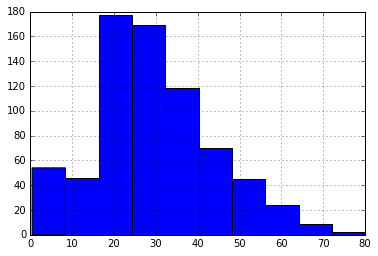

In [225]:
titanic.Age.hist()

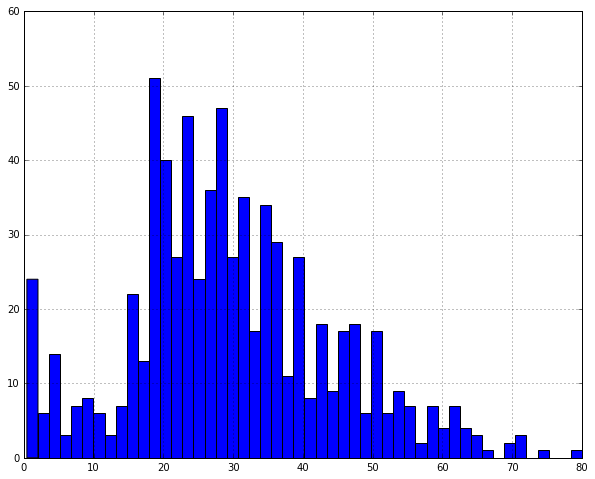

In [226]:
titanic.Age.hist(bins=50,figsize=(10,8))

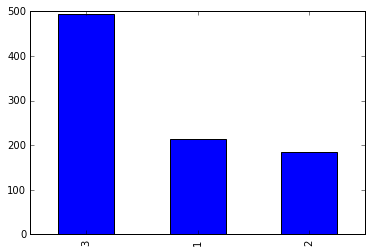

In [227]:
titanic.Pclass.value_counts().plot(kind='bar')

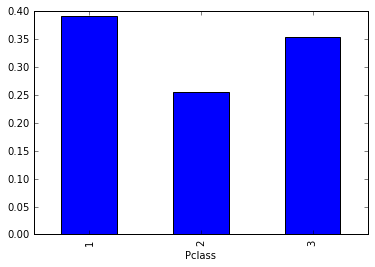

In [228]:
titanic.groupby('Pclass').Survived.sum().apply(lambda x:x.astype(np.float64)/sum(titanic.Survived)).plot(kind='bar')

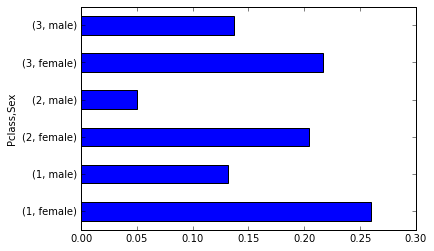

In [229]:
titanic.groupby(['Pclass','Sex']).Survived.sum().apply(lambda x:x.astype(np.float64)/sum(titanic.Survived)).plot(kind='barh')

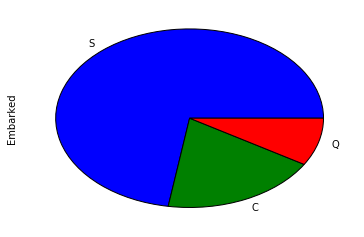

In [230]:
titanic.Embarked.value_counts().plot(kind='pie')

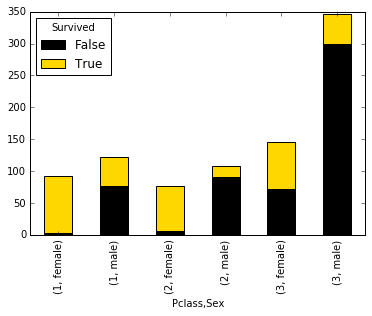

In [231]:
death_counts = pd.crosstab([titanic.Pclass, titanic.Sex], titanic.Survived.astype(bool))
death_counts.plot(kind='bar', stacked=True, color=['black','gold'], grid=False)

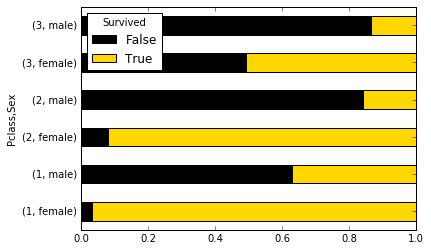

In [232]:
death_counts.div(death_counts.sum(1).astype(float), axis=0).plot(kind='barh', stacked=True, color=['black','gold'])

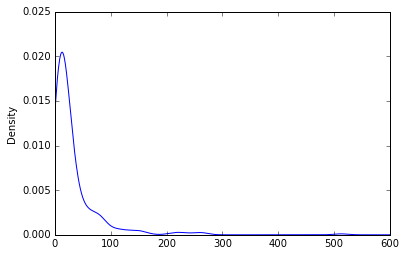

In [233]:
titanic.Fare.dropna().plot(kind='kde', xlim=(0,600))

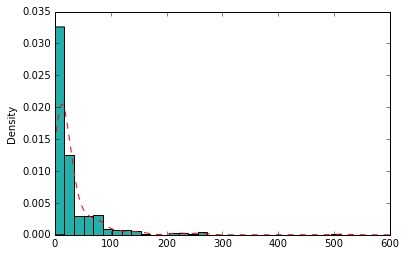

In [234]:
titanic.Fare.hist(bins=30, normed=True, color='lightseagreen')
titanic.Fare.dropna().plot(kind='kde', xlim=(0,600), style='r--')

{'boxes': [<matplotlib.lines.Line2D at 0x16e7ef28>],
 'caps': [<matplotlib.lines.Line2D at 0x16e8ec88>,
 'fliers': [<matplotlib.lines.Line2D at 0x16e9bd30>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x16e9b7b8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x16e8e128>,
  <matplotlib.lines.Line2D at 0x16e8e710>]}

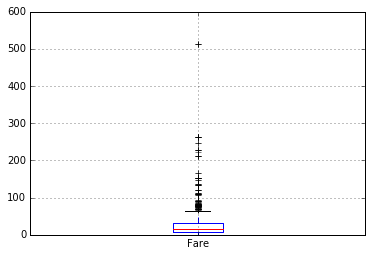

In [235]:
titanic.boxplot('Fare')

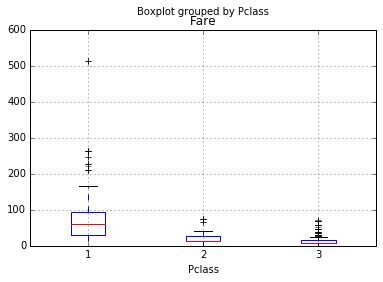

In [236]:
titanic.boxplot(column='Fare', by='Pclass', grid=True)

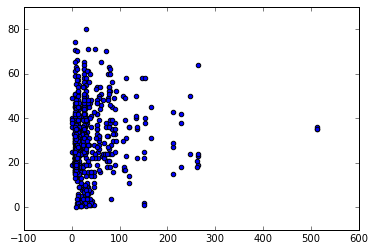

In [237]:
plt.scatter(titanic.Fare,titanic.Age)

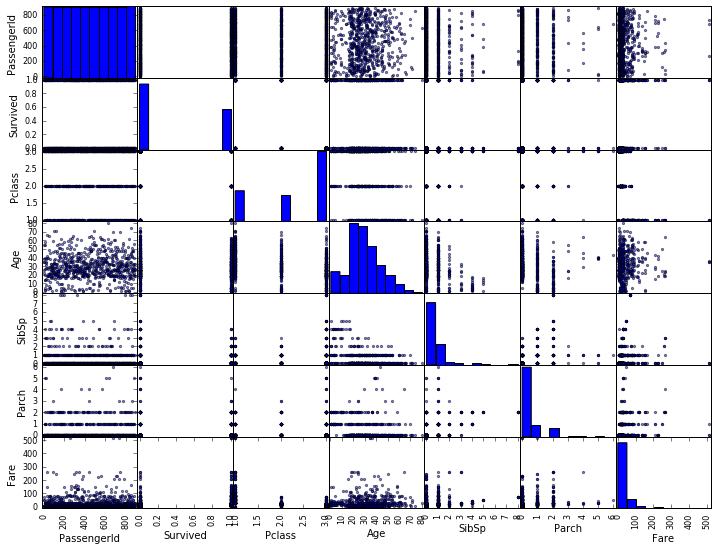

In [238]:
_ = pd.scatter_matrix(titanic,figsize=(12,9))